In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hist = np.fromfile('histograms.bin', dtype='double')
# in R matrices, values fills by column; in numpy, it fills by row
hist = hist.reshape((16, 40000)).T
hist = hist + .01 # to approximate log(0)

In [3]:
def MultinomialEM(hist, K, stop):
    n = hist.shape[0]
    d = hist.shape[1]
    
    # initialize parameters
    w = np.array([1/K]*K) # weights
    sample = np.random.randint(0, n, K)
    theta = hist[sample, :] # (K x d) normalization constant can be factored as C
    a = np.zeros(K*n).reshape(K, n)
    diff = 1
    iters = 1

    while diff > stop:
        # E-step
        LL = np.exp(np.matmul(np.log(theta), hist.T)) # (K x n) loglikelihood
        a_old = a
        w_LL = (LL.T*w).T # weighted LL
        a = w_LL/np.array([w_LL.sum(axis=0)]*K) # (K x n) soft-assignments
        # a = np.apply_along_axis(lambda x: x*w/np.dot(x, w), 0, LL) [SLOW!]
        
        # M-step
        w = a.mean(axis=1)
        b = np.matmul(a, hist) # (K x d)
        theta = (b.T/b.sum(axis=1)).T # (K x d)
        # theta = np.apply_along_axis(lambda x: x/sum(x), 1, b) [SLOW!]
        diff = np.linalg.norm((a-a_old), ord=1)
        iters += 1
    
    A = a.argmax(axis=0) # hard-assignments
    
    return iters, A

Iterations: 36


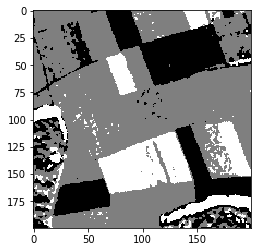

In [4]:
np.random.seed(0)
iters, A = MultinomialEM(hist, 3, .001)
print('Iterations:', iters)
A[A==0] = 0*255/2
A[A==1] = 1*255/2
A[A==2] = 2*255/2
A.shape = (200, 200)
plt.imshow(A, cmap='gray')

Iterations: 54


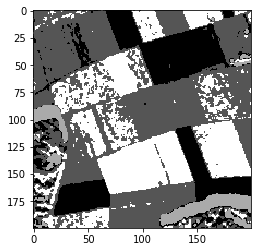

In [5]:
np.random.seed(0)
iters, A = MultinomialEM(hist, 4, .001)
print('Iterations:', iters)
A[A==0] = 0*255/3
A[A==1] = 1*255/3
A[A==2] = 2*255/3
A[A==3] = 3*255/3
A.shape = (200, 200)
plt.imshow(A, cmap='gray')

Iterations: 128


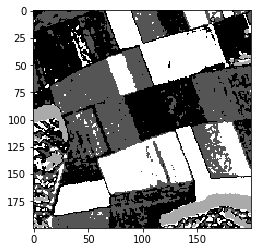

In [6]:
np.random.seed(0)
iters, A = MultinomialEM(hist, 5, .001)
print('Iterations:', iters)
A[A==0] = 0*255/3
A[A==1] = 1*255/3
A[A==2] = 2*255/3
A[A==3] = 3*255/3
A[A==4] = 4*255/4
A.shape = (200, 200)
plt.imshow(A, cmap='gray')

Iterations: 60


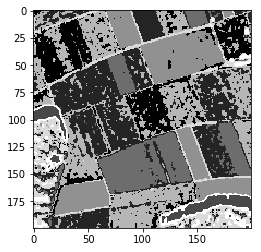

In [7]:
np.random.seed(0)
K = 8
iters, A = MultinomialEM(hist, K, .001)
print('Iterations:', iters)
for i in range(K):
    A[A==i] = i*255/(K-1)
A.shape = (200, 200)
plt.imshow(A, cmap='gray')